In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Student Alcohol Consumption

Zestaw pochodzi z https://www.kaggle.com/ , a dokladnie z https://www.kaggle.com/datasets/uciml/student-alcohol-consumption . 

Zestaw zawiera roznego rodzaju dane, takie jak wiek i plec ucznia, ale rowniez to jakie wyksztalcenie posiadaja rodzice, ile czasu uczen poswieca na nauke, a nawet to jak duzo alkoholu konsumuja w ciagu tygodnia.

Zajmiemy sie tylko czescia dotyczaca matematyki i bedziemy probowac znalezc ciekawe zaleznosci oraz przewidziec koncowa ocene.

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)


In [106]:
csv_path = "student-mat.csv"
data = pd.read_csv(csv_path)
data_original = pd.read_csv(csv_path)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Zacznijmy od delikatnej obrobki danych (te ktore maja binarne atrybuty, ale nie zapisane numerycznie)

In [107]:
# nie interesuje mnie ktora szkola, zbyt mala probka dla drugiej szkoly
data = data.drop(['school'], axis=1)

le = LabelEncoder()

# plec - m/k
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

# zamieszkanie - wies/miasto
le.fit(data.address.drop_duplicates())
data.address = le.transform(data.address)

# rozmiar rodziny - LE3/GT3
le.fit(data.famsize.drop_duplicates())
data.famsize = le.transform(data.famsize)

# rodzice razem - T/N
le.fit(data.Pstatus.drop_duplicates())
data.Pstatus = le.transform(data.Pstatus)

# dodatkowe wsparcie naukowe - T/N
le.fit(data.schoolsup.drop_duplicates())
data.schoolsup = le.transform(data.schoolsup)

# pomoc rodziny w nauce - T/N
le.fit(data.famsup.drop_duplicates())
data.famsup = le.transform(data.famsup)

# dodatkowe platne zajecia - T/N
le.fit(data.paid.drop_duplicates())
data.paid = le.transform(data.paid)

# dodatkowe aktywnosci - T/N
le.fit(data.activities.drop_duplicates())
data.activities = le.transform(data.activities)

# przedszkole - T/N
le.fit(data.nursery.drop_duplicates())
data.nursery = le.transform(data.nursery)

# chce isc na studia - T/N
le.fit(data.higher.drop_duplicates())
data.higher = le.transform(data.higher)

# dostep do internetu w domu - T/N
le.fit(data.internet.drop_duplicates())
data.internet = le.transform(data.internet)

# w zwiazku - T/N
le.fit(data.romantic.drop_duplicates())
data.romantic = le.transform(data.romantic)

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    int64 
 1   age         395 non-null    int64 
 2   address     395 non-null    int64 
 3   famsize     395 non-null    int64 
 4   Pstatus     395 non-null    int64 
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    int64 
 15  famsup      395 non-null    int64 
 16  paid        395 non-null    int64 
 17  activities  395 non-null    int64 
 18  nursery     395 non-null    int64 
 19  higher      395 non-null    int64 
 20  internet  

In [91]:
# nie binarne dane np. zawod rodzica
data = pd.get_dummies(data)

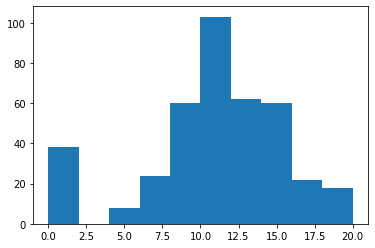

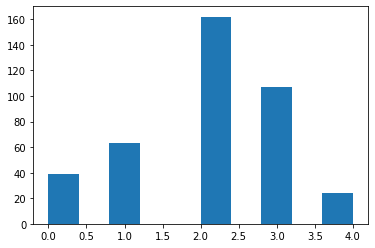

In [108]:
# nie bedziemy przewidywac konkretnego wyniku tylko to w ktorej czesci sie znajduje

divi = 20/5+0.1

plt.hist(data["G3"])
plt.show()

data["G1"] = data["G1"].div(divi).apply(np.floor).astype(int)
data["G2"] = data["G2"].div(divi).apply(np.floor).astype(int)
data["G3"] = data["G3"].div(divi).apply(np.floor).astype(int)

plt.hist(data["G3"])
plt.show()

In [109]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, random_state=42)
train
test

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,1,17,1,0,1,2,1,other,other,home,...,4,5,1,1,1,3,2,1,1,2
371,1,18,0,1,1,1,2,at_home,services,other,...,4,3,3,2,3,3,3,3,2,2
248,1,18,0,1,1,3,3,other,services,course,...,4,3,3,1,3,5,8,0,1,1
55,0,16,1,0,0,2,1,other,other,other,...,5,3,4,1,1,2,8,1,2,2
390,1,20,1,1,0,2,2,services,services,course,...,5,5,4,4,5,4,11,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,17,0,0,1,1,1,other,services,reputation,...,5,2,1,1,2,1,0,1,1,0
210,0,19,1,0,1,3,3,other,other,reputation,...,4,3,3,1,2,3,10,1,1,1
75,1,15,1,0,1,4,3,teacher,other,home,...,4,3,3,2,3,5,6,2,2,2
104,1,15,1,0,0,3,4,services,other,course,...,5,4,4,1,1,1,0,3,4,4


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'sex'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'address'),
  Text(0, 3.5, 'famsize'),
  Text(0, 4.5, 'Pstatus'),
  Text(0, 5.5, 'Medu'),
  Text(0, 6.5, 'Fedu'),
  Text(0, 7.5, 'traveltime'),
  Text(0, 8.5, 'studytime'),
  Text(0, 9.5, 'failures'),
  Text(0, 10.5, 'schoolsup'),
  Text(0, 11.5, 'famsup'),
  Text(0, 12.5, 'paid'),
  Text(0, 13.5, 'activities'),
  Text(0, 14.5, 'nursery'),
  Text(0, 15.5, 'higher'),
  Text(0, 16.5, 'internet'),
  Text(0, 17.5, 'romantic'),
  Text(0, 18.5, 'famrel'),
  Text(0, 19.5, 'freetime'),
  Text(0, 20.5, 'goout'),
  Text(0, 21.5, 'Dalc'),
  Text(0, 22.5, 'Walc'),
  Text(0, 23.5, 'health'),
  Text(0, 24.5, 'absences'),
  Text(0, 25.5, 'G1'),
  Text(0, 26.5, 'G2'),
  Text(0, 27.5, 'G3')])

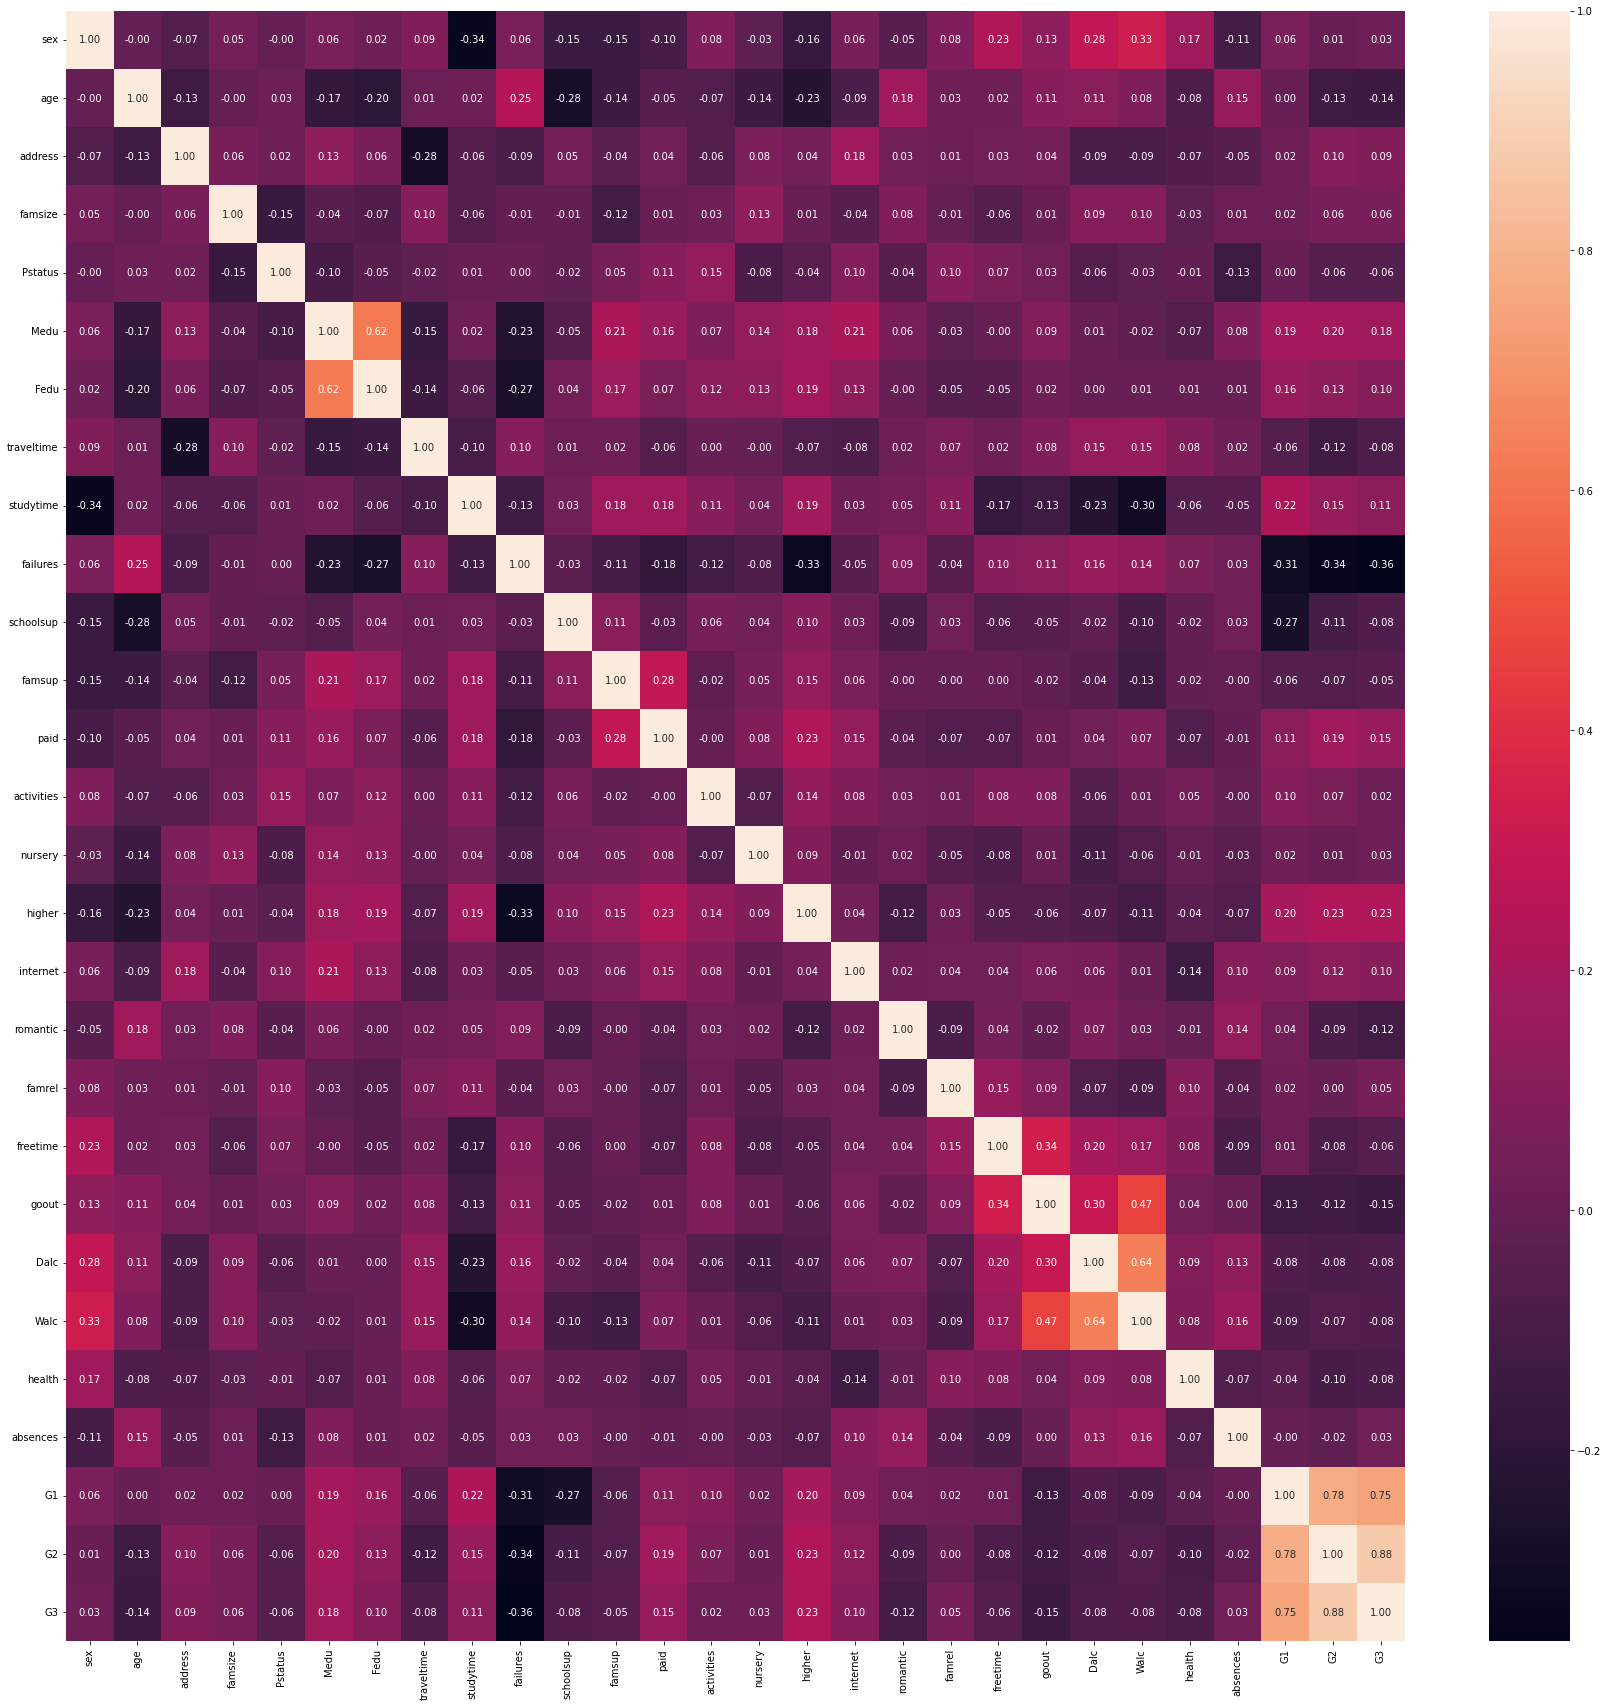

In [152]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cbar=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


Widzimy kilka silnych zaleznosci np. miedzy ocenami za poszczegolne semestry (albo wieksze okresy czasu), iloscia spozytek alkoholu w weekendy i w ciagu tygodnia, poziomem edukacji rodzicow.
Widac tez, ze jesli ktos ma duzo poprawek to ma tez gorsze oceny lub to ze jesli sie duzo uczy to pije mniej alkoholu.

In [110]:
X_train = train
y_train = train["G3"]
X_train = X_train.drop("G3", axis=1)

X_test = test
y_test = test["G3"]
X_test = X_test.drop("G3", axis=1)

In [111]:
X_train = X_train.drop("Mjob", axis=1)
X_train = X_train.drop("Fjob", axis=1)
X_train = X_train.drop("guardian", axis=1)
X_train = X_train.drop("reason", axis=1)

X_test = X_test.drop("Fjob", axis=1)
X_test = X_test.drop("guardian", axis=1)
X_test = X_test.drop("Mjob", axis=1)
X_test = X_test.drop("reason", axis=1)

In [112]:
X_test = X_test.drop("G1", axis=1)
X_train = X_train.drop("G1", axis=1)

In [113]:
X_train = X_train.drop("G2", axis=1)
X_test = X_test.drop("G2", axis=1)

In [114]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso

In [179]:
# SVM kernel rbf
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="rbf"))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.01, 0.03, 0.05],
            'classifier__C': [1, 10, 20, 50, 100, 500, 1000, 5000],
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_1 = ["SVM rbf", grid.best_estimator_]

{'classifier__C': 500, 'classifier__gamma': 0.0001, 'preprocessing': None}
0.803728813559322


In [180]:
# SVM kernel poly
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly"))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.1, 0.2, 0.3, 0.4],
            'classifier__C': [0.6, 0.8, 1, 2],
            'classifier__coef0':[0, 1],
            'classifier__degree':[0, 1, 2]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_2 = ["SVM poly", grid.best_estimator_]

{'classifier__C': 0.8, 'classifier__coef0': 0, 'classifier__degree': 1, 'classifier__gamma': 0.2, 'preprocessing': None}
0.8002824858757063


In [181]:
# SVM kernel linear
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear"))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2],
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_3 = ["SVM linear", grid.best_estimator_]

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}
0.7936158192090396


In [182]:
# SVM kernel sigmoid
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="sigmoid"))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001,0.005, 0.01, 0.1, 0.5, 1, 5, 10],
            'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
            'classifier__coef0':[0, 1]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_4 = ["SVM sigmoid", grid.best_estimator_]

{'classifier__C': 100, 'classifier__coef0': 0, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler()}
0.7936158192090396


In [183]:
# SVR kernel rbf
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR(kernel="rbf"))])

param_grid={
    'preprocessing': [StandardScaler(), None],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10 ,100, 1000],
    'classifier__gamma': [0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10 ,100, 1000]
},

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_5 = ["SVR rbf", grid.best_estimator_]

{'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': None}
0.7991271330824817


In [184]:
# SVR kernel poly
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR(kernel="poly"))])

param_grid={
    'preprocessing': [StandardScaler(), None],
    'classifier__C': [10, 100, 1000],
    'classifier__gamma': [0.0001, 0.001, 0.01],
    'classifier__degree': [1, 2],
    'classifier__coef0':[0]
},

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_6 = ["SVR poly", grid.best_estimator_]

{'classifier__C': 100, 'classifier__coef0': 0, 'classifier__degree': 2, 'classifier__gamma': 0.001, 'preprocessing': None}
0.7970251294862033


In [185]:
# linear regression
grid = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_7 = ["linear regression", grid.best_estimator_]


{'polynomialfeatures__degree': 1}
0.7678356133508716


In [187]:
# lasso regression
grid=GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(), Lasso()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3],
                        'lasso__alpha': [100, 10, 1, 0.1]
                    },
                    cv=kfold)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_8 = ["lasso regression", grid.best_estimator_]

/home/pitkokopytko/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.102e-02, tolerance: 2.449e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 1}
0.7756284588468743


In [188]:
# ridge regression
grid = GridSearchCV(make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                        'ridge__alpha': [1, 10, 100, 1000]},
                    cv=kfold)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_9 = ["Ridge regression", grid.best_estimator_]

{'polynomialfeatures__degree': 1, 'ridge__alpha': 10}
0.7691714544769332


In [189]:
# random forest
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42))])

param_grid={
    'preprocessing': [StandardScaler(), None],
    'classifier__n_estimators': [100, 1000, 2000],
    'classifier__max_leaf_nodes': [10, 20, 40],
},

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

model_10 = ["random forest", grid.best_estimator_]

{'classifier__max_leaf_nodes': 40, 'classifier__n_estimators': 2000, 'preprocessing': StandardScaler()}
0.8172316384180792


In [190]:
from sklearn import  metrics


models = []
models.append(model_1)
models.append(model_2)
models.append(model_3)
models.append(model_4)
models.append(model_5)
models.append(model_6)
models.append(model_7)
models.append(model_8)
models.append(model_9)
models.append(model_10)

def CalculateScores(X, y, dataName):
    names = []
    precision_score = []
    recall_score = []
    f1_score = []
    accuracy_score = []
    print(dataName)
    for name, model in models:
        print(name)
        print("R^2: {}".format(metrics.precision_score              (y, model.predict(X).round().astype(int), average="weighted", zero_division=0) ))
        print("recall_score: {}".format( metrics.recall_score       (y, model.predict(X).round().astype(int), average="weighted") ))
        print("f1_score: {}".format( metrics.f1_score               (y, model.predict(X).round().astype(int), average="weighted") ))
        print("accuracy_score: {}".format( metrics.accuracy_score   (y, model.predict(X).round().astype(int)) ))
        names.append(name)
        precision_score.append(metrics.precision_score              (y, model.predict(X).round().astype(int), average="weighted", zero_division=0))
        recall_score.append(metrics.recall_score                    (y, model.predict(X).round().astype(int), average="weighted"))
        f1_score.append( metrics.f1_score                           (y, model.predict(X).round().astype(int), average="weighted"))
        accuracy_score.append(metrics.accuracy_score                (y, model.predict(X).round().astype(int)))
    return [names, precision_score, recall_score, f1_score, accuracy_score]

trainResults = CalculateScores(X_train, y_train, "train")
print()
testResults = CalculateScores(X_test, y_test, "test")



train
SVM rbf
R^2: 0.8718862169592095
recall_score: 0.8682432432432432
f1_score: 0.8669924467462667
accuracy_score: 0.8682432432432432
SVM poly
R^2: 0.8704072392868067
recall_score: 0.8682432432432432
f1_score: 0.8672325239722953
accuracy_score: 0.8682432432432432
SVM linear
R^2: 0.8495653139270161
recall_score: 0.847972972972973
f1_score: 0.8465039778827187
accuracy_score: 0.847972972972973
SVM sigmoid
R^2: 0.8495653139270161
recall_score: 0.847972972972973
f1_score: 0.8465039778827187
accuracy_score: 0.847972972972973
SVR rbf
R^2: 0.8613230587398544
recall_score: 0.8412162162162162
f1_score: 0.8385178193766353
accuracy_score: 0.8412162162162162
SVR poly
R^2: 0.8509024102559571
recall_score: 0.831081081081081
f1_score: 0.8267908590075048
accuracy_score: 0.831081081081081
linear regression
R^2: 0.8487568917361464
recall_score: 0.8277027027027027
f1_score: 0.8238811916773762
accuracy_score: 0.8277027027027027
lasso regression
R^2: 0.8435573731626362
recall_score: 0.8209459459459459
f1_s

In [85]:
def drawPlot(set):
    barWidth=0.2
    xs = np.arange(len(set[0]))
    plt.figure(figsize=(20,5))

    plt.bar(xs, set[1], color='darkturquoise', width=barWidth, label='precision', edgecolor='gray')
    plt.bar(xs+barWidth, set[2], color='yellowgreen', width=barWidth, label='recall', edgecolor='gray')
    plt.bar(xs+2*barWidth, set[3], color='coral', width=barWidth, label='f1', edgecolor='gray')
    plt.bar(xs+3*barWidth, set[4], color='gold', width=barWidth, label='accuracy', edgecolor='gray')

    plt.xticks(xs+barWidth, set[0])
    plt.legend()
    plt.show()

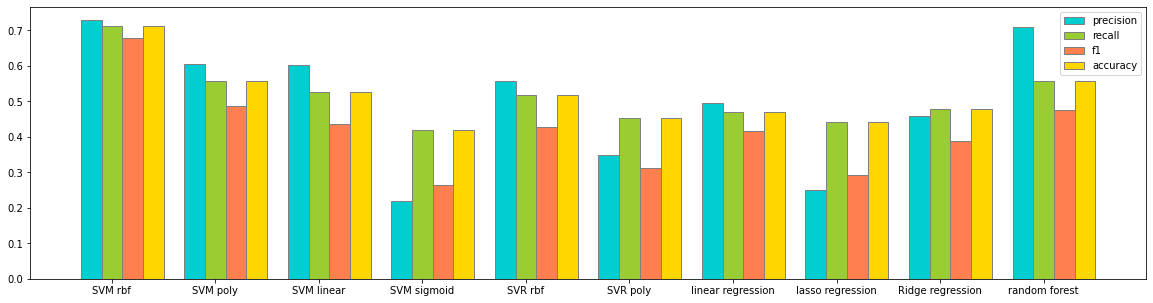

In [99]:
# with dummy variables, no g1/g2
drawPlot(trainResults)


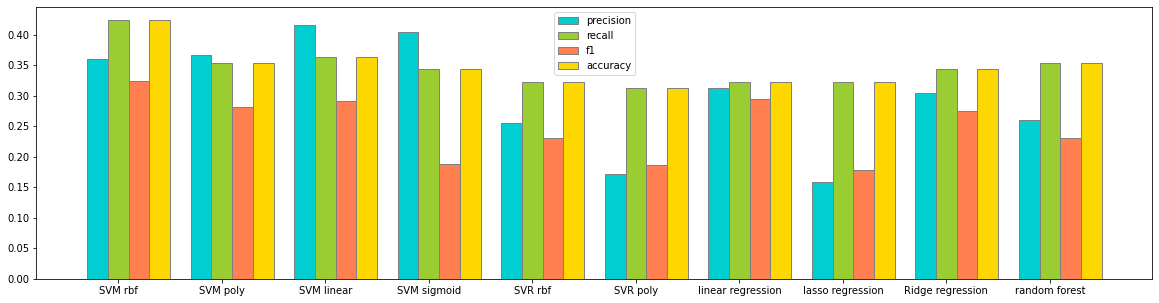

In [100]:
# with dummy variables, no g1/g2
drawPlot(testResults)


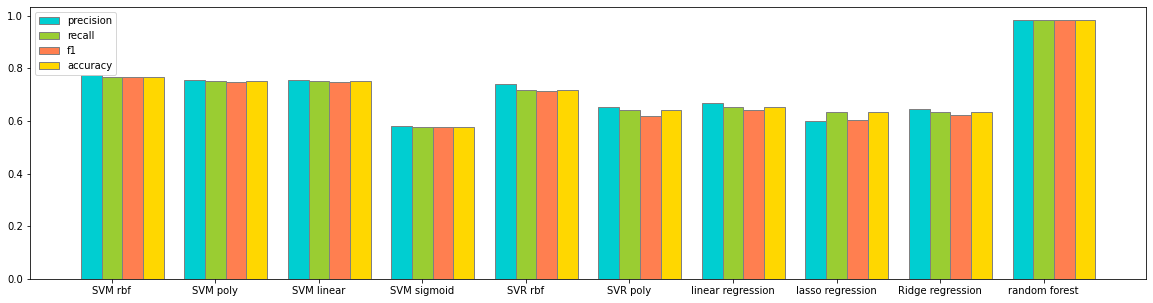

In [122]:
# with dummy variables, with g1
drawPlot(trainResults)


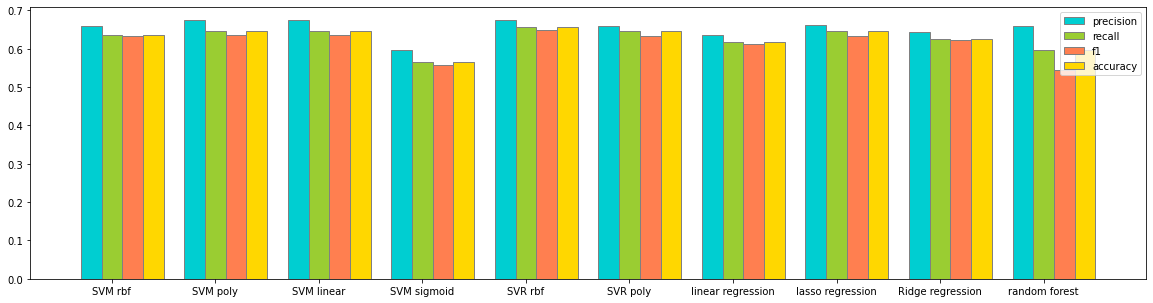

In [123]:
# with dummy variables, with g1
drawPlot(testResults)


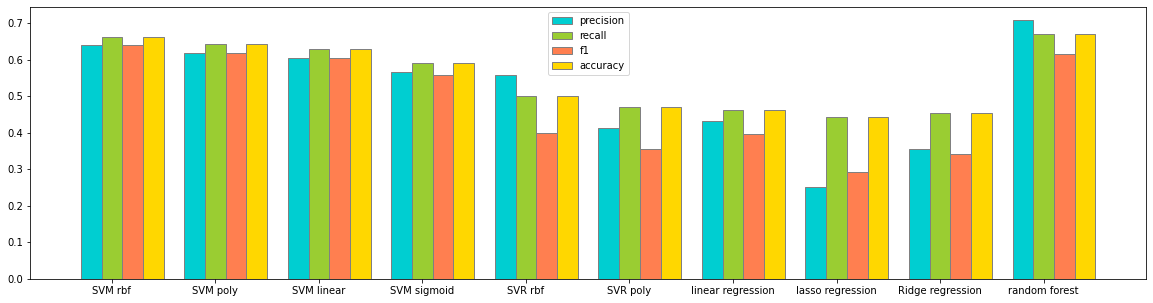

In [145]:
# no dummy variables, no g1/g2
drawPlot(trainResults)


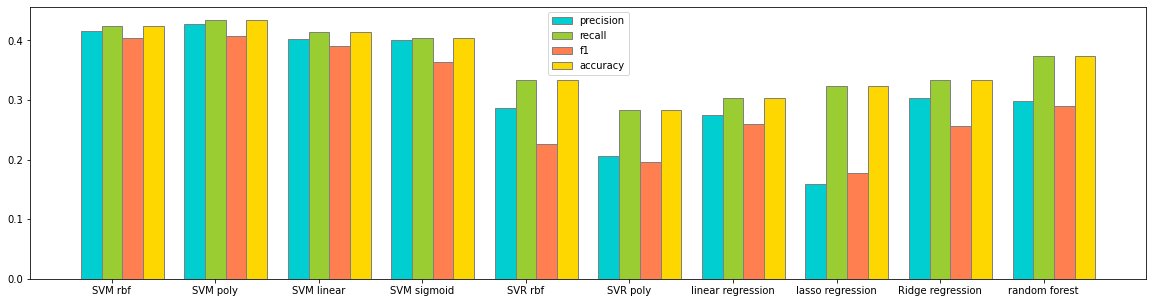

In [146]:
# no dummy variables, no g1/g2
drawPlot(testResults)


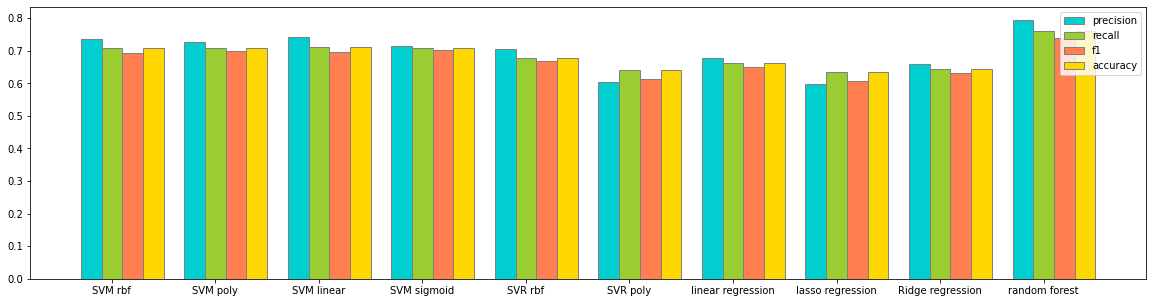

In [169]:
# no dummy variables, with g1
drawPlot(trainResults)


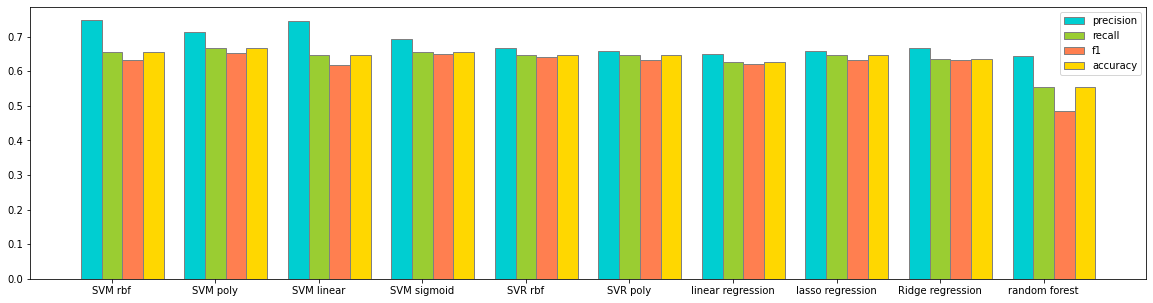

In [170]:
# no dummy variables, with g1
drawPlot(testResults)


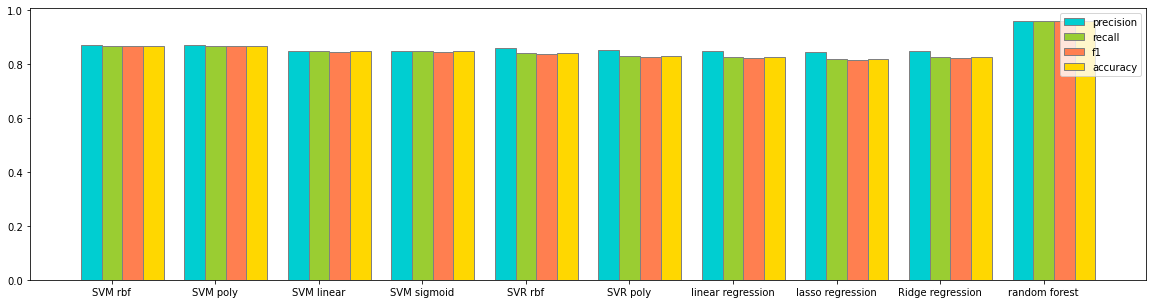

In [191]:
# no dummy variables, with g1/g2
drawPlot(trainResults)


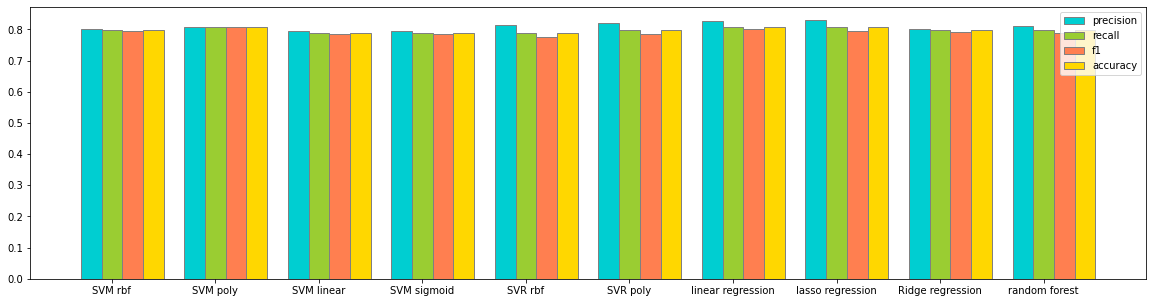

In [192]:
# no dummy variables, with g1/g2
drawPlot(testResults)


In [ ]:
# neural networks

In [115]:
from sklearn.neural_network import MLPRegressor
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPRegressor(learning_rate="adaptive", solver='adam', random_state=seed))])

param_grid = {
    'preprocessing': [StandardScaler(), None],
    'classifier__hidden_layer_sizes':[(100, 50, 10), (50, 20), (100)],
    'classifier__activation':['relu'],
    'classifier__max_iter':[2000],
    'classifier__batch_size':[8, 16],
    'classifier__learning_rate_init':[0.001]
}
grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)
print(grid.best_params_)
model_1=["MLP regressor", grid.best_estimator_]

{'classifier__activation': 'relu', 'classifier__batch_size': 8, 'classifier__hidden_layer_sizes': 100, 'classifier__learning_rate_init': 0.001, 'classifier__max_iter': 2000, 'preprocessing': None}


In [116]:
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier(learning_rate="adaptive", solver='adam', random_state=seed))])

param_grid = {
    'preprocessing': [StandardScaler(), None],
    'classifier__hidden_layer_sizes':[(100, 50, 10), (50, 10), (100)],
    'classifier__activation':['relu'],
    'classifier__max_iter':[1000],
    'classifier__batch_size':[16],
    'classifier__learning_rate_init':[0.001]
}
grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)
print(grid.best_params_)
model_2=["MLP classifier", grid.best_estimator_]

/home/pitkokopytko/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/pitkokopytko/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/pitkokopytko/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/pitkokopytko/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/pi

{'classifier__activation': 'relu', 'classifier__batch_size': 16, 'classifier__hidden_layer_sizes': (100, 50, 10), 'classifier__learning_rate_init': 0.001, 'classifier__max_iter': 500, 'preprocessing': None}


In [117]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Normalization
tf.random.set_seed(seed)
m_3 = Sequential()
normalize = Normalization()
X_t, y_t = X_train, y_train
normalize.adapt(X_t)
m_3.add(normalize)
m_3.add(Dense(100, activation='sigmoid', input_shape=(X_train.shape[1],)))
m_3.add(Dense(50, activation='relu'))
m_3.add(Dense(5, activation='relu'))
m_3.add(Dense(1, activation='relu'))

m_3.compile(loss=tf.losses.MeanSquaredError(), optimizer='Adam', metrics=["accuracy"])
m_3.fit(X_t, y_t, validation_data=(X_test, y_test), batch_size=16, epochs=128)
model_3 = ['keras relu', m_3]

Epoch 1/128
19/19 [==============================] - 1s 21ms/step - loss: 3.0984 - accuracy: 0.1453 - val_loss: 1.5185 - val_accuracy: 0.2020
Epoch 2/128
19/19 [==============================] - 0s 8ms/step - loss: 1.0847 - accuracy: 0.1453 - val_loss: 1.1422 - val_accuracy: 0.2020
Epoch 3/128
19/19 [==============================] - 0s 9ms/step - loss: 0.9941 - accuracy: 0.1453 - val_loss: 1.0697 - val_accuracy: 0.2020
Epoch 4/128
19/19 [==============================] - 0s 7ms/step - loss: 0.9520 - accuracy: 0.1453 - val_loss: 1.0378 - val_accuracy: 0.2020
Epoch 5/128
19/19 [==============================] - 0s 7ms/step - loss: 0.9384 - accuracy: 0.1453 - val_loss: 1.0155 - val_accuracy: 0.2020
Epoch 6/128
19/19 [==============================] - 0s 7ms/step - loss: 0.9001 - accuracy: 0.1453 - val_loss: 0.9965 - val_accuracy: 0.2020
Epoch 7/128
19/19 [==============================] - 0s 7ms/step - loss: 0.8821 - accuracy: 0.1453 - val_loss: 0.9848 - val_accuracy: 0.2020
Epoch 8/128


In [118]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Normalization
tf.random.set_seed(seed)
m_4 = Sequential()
normalize = Normalization()
X_t, y_t = X_train, y_train
normalize.adapt(X_t)
m_4.add(normalize)
m_4.add(Dense(100, activation='sigmoid', input_shape=(X_train.shape[1],)))
m_4.add(Dense(50, activation='selu'))
m_4.add(Dense(5, activation='selu'))
m_4.add(Dense(1, activation='selu'))

m_4.compile(loss=tf.losses.MeanSquaredError(), optimizer='Adam', metrics=['accuracy'])
m_4.fit(X_t, y_t, validation_data=(X_test, y_test), batch_size=16, epochs=128)
model_4 = ['keras selu', m_4]

Epoch 1/128
19/19 [==============================] - 1s 21ms/step - loss: 2.1033 - accuracy: 0.1453 - val_loss: 1.1493 - val_accuracy: 0.2020
Epoch 2/128
19/19 [==============================] - 0s 7ms/step - loss: 1.0693 - accuracy: 0.1453 - val_loss: 1.1296 - val_accuracy: 0.2020
Epoch 3/128
19/19 [==============================] - 0s 7ms/step - loss: 1.0038 - accuracy: 0.1453 - val_loss: 1.1081 - val_accuracy: 0.2020
Epoch 4/128
19/19 [==============================] - 0s 7ms/step - loss: 0.9800 - accuracy: 0.1453 - val_loss: 1.0816 - val_accuracy: 0.2020
Epoch 5/128
19/19 [==============================] - 0s 8ms/step - loss: 0.9736 - accuracy: 0.1453 - val_loss: 1.0608 - val_accuracy: 0.2020
Epoch 6/128
19/19 [==============================] - 0s 7ms/step - loss: 0.9336 - accuracy: 0.1453 - val_loss: 1.0364 - val_accuracy: 0.2020
Epoch 7/128
19/19 [==============================] - 0s 8ms/step - loss: 0.9135 - accuracy: 0.1453 - val_loss: 1.0178 - val_accuracy: 0.2020
Epoch 8/128


In [119]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Normalization
from keras.layers import Activation
tf.random.set_seed(seed)
m_5 = Sequential()
normalize = Normalization()
X_t, y_t = X_train, y_train
normalize.adapt(X_t)
m_5.add(normalize)
m_5.add(Dense(100, use_bias=False , input_shape=(X_train.shape[1],)))
m_5.add(BatchNormalization())
m_5.add(Activation("sigmoid"))
m_5.add(Dense(50, use_bias=False ))
m_5.add(BatchNormalization())
m_5.add(Activation("selu"))
m_5.add(Dense(5, use_bias=False ))
m_5.add(BatchNormalization())
m_5.add(Activation("selu"))
m_5.add(Dense(1, activation='selu'))

m_5.compile(loss=tf.losses.MeanSquaredError(), optimizer='Adam', metrics=["accuracy"])
m_5.fit(X_t, y_t, validation_data=(X_test, y_test), batch_size=16, epochs=128)
model_5 = ['keras batch normalize selu ', m_5]

Epoch 1/128
19/19 [==============================] - 2s 25ms/step - loss: 5.3662 - accuracy: 0.1047 - val_loss: 5.9660 - val_accuracy: 0.0909
Epoch 2/128
19/19 [==============================] - 0s 9ms/step - loss: 4.8148 - accuracy: 0.1115 - val_loss: 5.9117 - val_accuracy: 0.0909
Epoch 3/128
19/19 [==============================] - 0s 9ms/step - loss: 4.6051 - accuracy: 0.1149 - val_loss: 5.6380 - val_accuracy: 0.0909
Epoch 4/128
19/19 [==============================] - 0s 9ms/step - loss: 4.3461 - accuracy: 0.1115 - val_loss: 5.3040 - val_accuracy: 0.0909
Epoch 5/128
19/19 [==============================] - 0s 8ms/step - loss: 4.1401 - accuracy: 0.1182 - val_loss: 4.9015 - val_accuracy: 0.0909
Epoch 6/128
19/19 [==============================] - 0s 11ms/step - loss: 4.0089 - accuracy: 0.1216 - val_loss: 4.7605 - val_accuracy: 0.1010
Epoch 7/128
19/19 [==============================] - 0s 11ms/step - loss: 3.7222 - accuracy: 0.1318 - val_loss: 4.2102 - val_accuracy: 0.1212
Epoch 8/12

In [120]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Normalization
from keras.layers import Activation
tf.random.set_seed(seed)
m_6 = Sequential()
normalize = Normalization()
X_t, y_t = X_train, y_train
normalize.adapt(X_t)
m_6.add(normalize)
m_6.add(Dense(100, use_bias=False , input_shape=(X_train.shape[1],)))
m_6.add(BatchNormalization())
m_6.add(Activation("sigmoid"))
m_6.add(Dense(50, use_bias=False ))
m_6.add(BatchNormalization())
m_6.add(Activation("relu"))
m_6.add(Dense(5, use_bias=False ))
m_6.add(BatchNormalization())
m_6.add(Activation("relu"))
m_6.add(Dense(1, activation='relu'))

m_6.compile(loss=tf.losses.MeanSquaredError(), optimizer='Adam', metrics=["accuracy"])
m_6.fit(X_t, y_t, validation_data=(X_test, y_test), batch_size=16, epochs=128)
model_6 = ['keras batch normalize relu ', m_6]

Epoch 1/128
19/19 [==============================] - 2s 23ms/step - loss: 4.7427 - accuracy: 0.1047 - val_loss: 5.1628 - val_accuracy: 0.0909
Epoch 2/128
19/19 [==============================] - 0s 9ms/step - loss: 4.4624 - accuracy: 0.1047 - val_loss: 5.0054 - val_accuracy: 0.0909
Epoch 3/128
19/19 [==============================] - 0s 9ms/step - loss: 4.1598 - accuracy: 0.1014 - val_loss: 4.8412 - val_accuracy: 0.0909
Epoch 4/128
19/19 [==============================] - 0s 9ms/step - loss: 3.9261 - accuracy: 0.1149 - val_loss: 4.7412 - val_accuracy: 0.0909
Epoch 5/128
19/19 [==============================] - 0s 9ms/step - loss: 3.6873 - accuracy: 0.1216 - val_loss: 4.6211 - val_accuracy: 0.0909
Epoch 6/128
19/19 [==============================] - 0s 8ms/step - loss: 3.4758 - accuracy: 0.1284 - val_loss: 4.4672 - val_accuracy: 0.1111
Epoch 7/128
19/19 [==============================] - 0s 11ms/step - loss: 3.1724 - accuracy: 0.1385 - val_loss: 4.1990 - val_accuracy: 0.1212
Epoch 8/128

In [121]:
models = []
models.append(model_1)
models.append(model_2)
models.append(model_3)
models.append(model_4)
models.append(model_5)
models.append(model_6)


def CalculateScores(X, y, dataName):
    names = []
    precision_score = []
    recall_score = []
    f1_score = []
    accuracy_score = []
    print(dataName)
    for name, model in models:
        print(name)
        print("R^2: {}".format(metrics.precision_score              (y, model.predict(X).round().astype(int), average="weighted", zero_division=0) ))
        print("recall_score: {}".format( metrics.recall_score       (y, model.predict(X).round().astype(int), average="weighted", zero_division=0) ))
        print("f1_score: {}".format( metrics.f1_score               (y, model.predict(X).round().astype(int), average="weighted", zero_division=0) ))
        print("accuracy_score: {}".format( metrics.accuracy_score   (y, model.predict(X).round().astype(int)) ))
        names.append(name)
        precision_score.append(metrics.precision_score              (y, model.predict(X).round().astype(int), average="weighted", zero_division=0))
        recall_score.append(metrics.recall_score                    (y, model.predict(X).round().astype(int), average="weighted", zero_division=0))
        f1_score.append( metrics.f1_score                           (y, model.predict(X).round().astype(int), average="weighted", zero_division=0))
        accuracy_score.append(metrics.accuracy_score                (y, model.predict(X).round().astype(int)))
    return [names, precision_score, recall_score, f1_score, accuracy_score]

trainResults = CalculateScores(X_train, y_train, "train")
print()
testResults = CalculateScores(X_test, y_test, "test")



train
MLP regressor
R^2: 0.9146244356484632
recall_score: 0.9121621621621622
f1_score: 0.9116610370306409
accuracy_score: 0.9121621621621622
MLP classifier
R^2: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0
keras relu
10/10 [==============================] - 0s 3ms/step
R^2: 0.7264020033511631
10/10 [==============================] - 0s 3ms/step
recall_score: 0.7027027027027027
10/10 [==============================] - 0s 4ms/step
f1_score: 0.6842586340926227
10/10 [==============================] - 0s 3ms/step
accuracy_score: 0.7027027027027027
10/10 [==============================] - 0s 2ms/step
keras selu
10/10 [==============================] - 0s 2ms/step
R^2: 0.7366624803244951
10/10 [==============================] - 0s 2ms/step
recall_score: 0.7128378378378378
10/10 [==============================] - 0s 3ms/step
f1_score: 0.7057300888347245
10/10 [==============================] - 0s 2ms/step
accuracy_score: 0.7128378378378378
10/10 [==============================] - 0

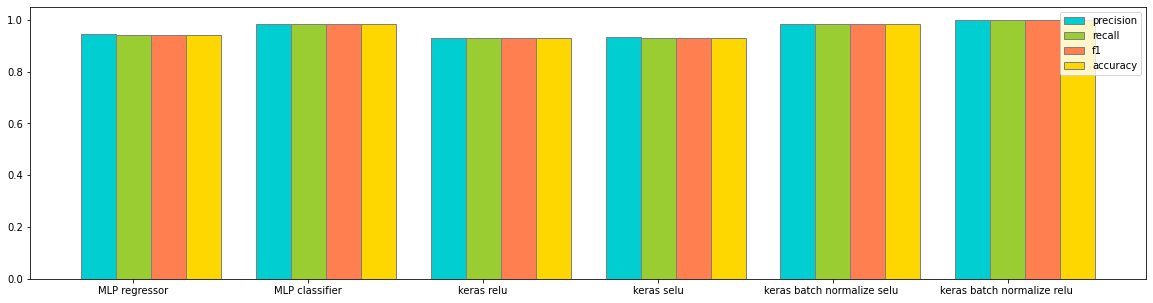

In [86]:
# no dummy variables, with g1/g2
drawPlot(trainResults)

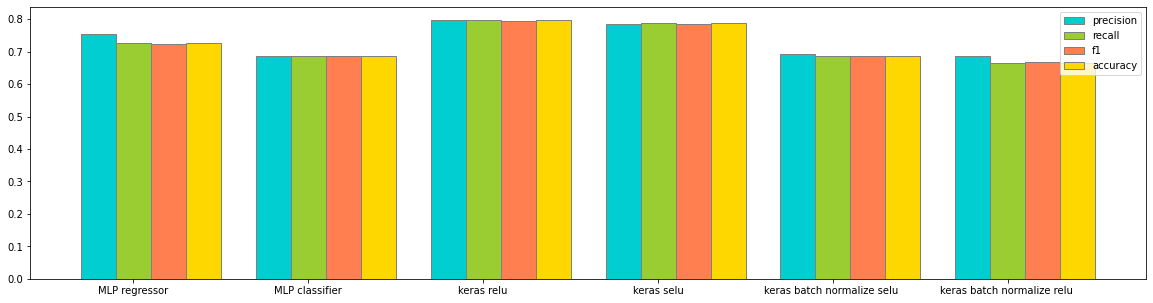

In [87]:
# no dummy variables, with g1/g2
drawPlot(testResults)

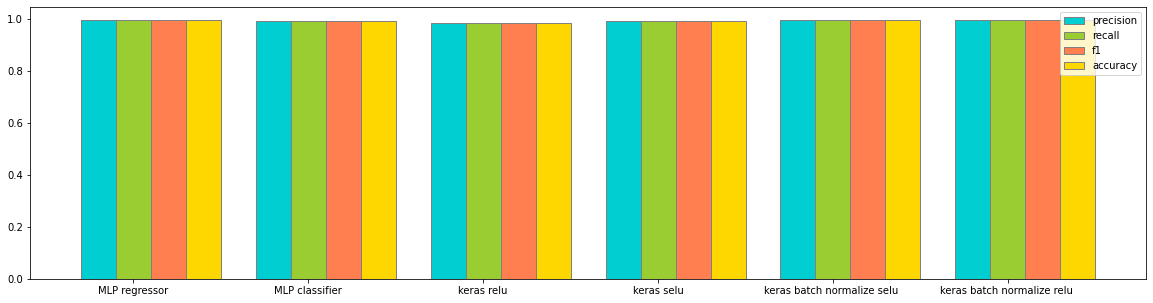

In [103]:
# with dummy variables, with g1/g2
drawPlot(trainResults)

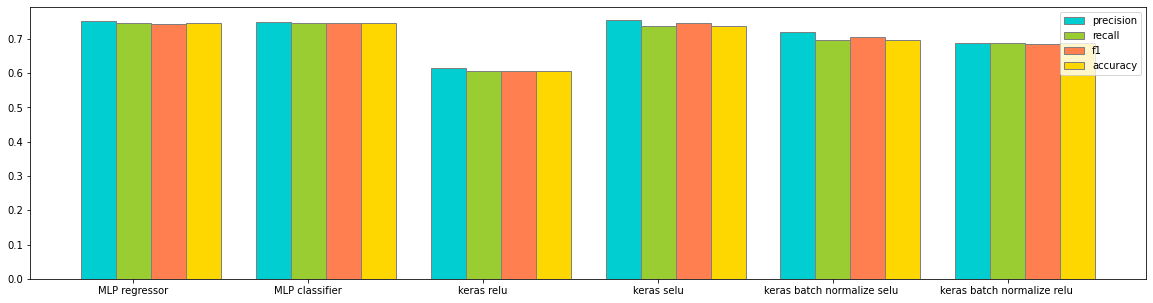

In [104]:
# with dummy variables, with g1/g2
drawPlot(testResults)

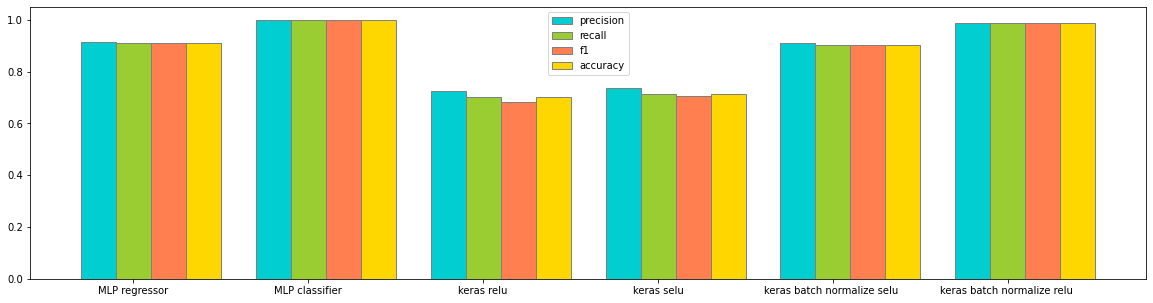

In [122]:
# no dummy variables, no g1/g2
drawPlot(trainResults)

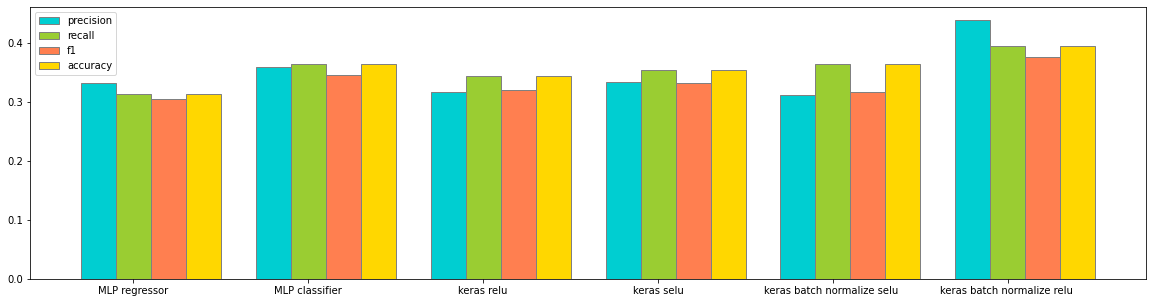

In [123]:
# no dummy variables, no g1/g2
drawPlot(testResults)

Najlepiej radza sobie SVM (rbf, poly) oraz sieci neuronowe bez batch normalization. Random forest classifier bardzo czesto ma mocny overfitting przez co traci na test. sieci neuronowe rowniez bardzo dopasowuja sie do zbioru treningowego ale maja lepsze (niz forest) wyniki na test.
sieci neuronowe z aktywacja inna niz relu/selu mialy bardzo niskie wyniki